In [19]:
#Imports

import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler


In [20]:
#Reading dataset

dataset = pd.read_csv('May9.csv')
dataset.head()

,x,y
0,0.374540,2.110789
1,0.950714,5.166390
2,0.731994,3.287958
3,0.598658,2.383672
4,0.156019,3.933705


In [21]:
x = dataset['x'].values.reshape(-1,1)
y = dataset['y'].values.reshape(-1,1)


In [22]:
# scaling the data points to be closer to each other for easier understanding and computation

scaler = StandardScaler() 
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [23]:
def gd(inputs, target, learning_rate, number_itts):
    m = 0
    c = 0
    n = len(inputs)

    for _ in range(number_itts):
        y_pred = m * inputs + c
        error = y_pred - target

        m-=(learning_rate*np.sum(inputs * error)) / n
        c-=(learning_rate*np.sum(error)) / n
    
    return m,c

In [24]:
gd_m,gd_c = gd(x,y,0.01,40)

gd_m = round(gd_m,4)
gd_c = round(gd_c,4)

print('GD Slope (m):',gd_m,"\nGC (c):",gd_c)

GD Slope (m): 0.2138 
GC (c): 0.0


# Ridge Regression

In [28]:
ridge_lr = Ridge()

args = {
    'alpha': [0.01, 1, 0.1],
    'fit_intercept':[True]
}

grid = GridSearchCV(ridge_lr,args,cv=3)
grid.fit(x,y)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.01, 1, 0.1], 'fit_intercept': [True]})

In [30]:
best_model =grid.best_estimator_
r_m = best_model.coef_[0][0]
r_c = best_model.intercept_[0]

print(f"Best Aplha: {best_model}")
print(f"Best Slope (m): {r_m}")
print(f"Best (c): {r_c}")

Best Aplha: Ridge(alpha=1)
Best Slope (m): 0.6150295477136146
Best (c): 2.400262813777212e-16


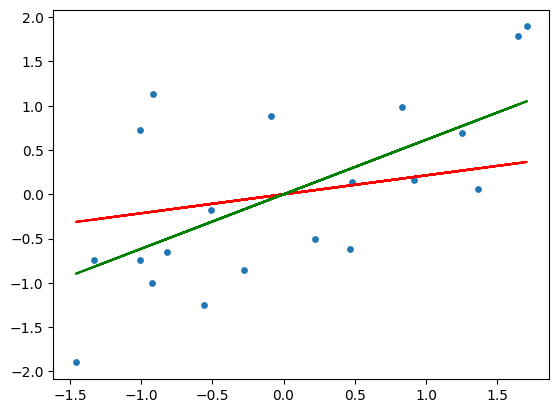

In [33]:
import matplotlib.pyplot as plt

plt.scatter(x,y,s=15)

y_pred_gd = gd_m * x + gd_c
y_pred_r = r_m * x + r_c

plt.plot(x,y_pred_gd,color='red')
plt.plot(x,y_pred_r,color='green')



plt.show()

### Mean Squared Error

In [35]:
print(mean_squared_error(y,y_pred_gd))
print(mean_squared_error(y,y_pred_r))

0.7695744736675414
0.5839125209831054
